In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import os

In [2]:
#importar dados
fileName = "/dados/tempo.csv"
fullpath = os.getcwd() + fileName
dataset = pd.read_csv(fullpath, sep=";")
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
#tamanho
dataset.shape

(14, 5)

In [4]:
#explorando dados categoricos
#Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

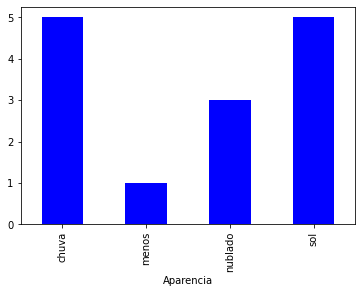

In [5]:
agrupado.plot.bar(color = 'blue')

In [6]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

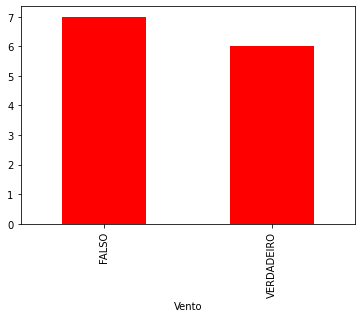

In [7]:
agrupado.plot.bar(color = 'red')

In [8]:
#Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

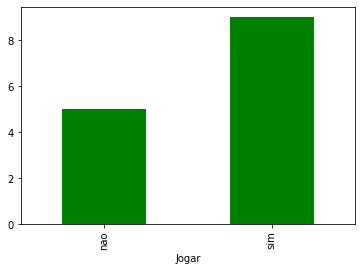

In [9]:
agrupado.plot.bar(color = 'green')

In [10]:
#explorando colunas númericas
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

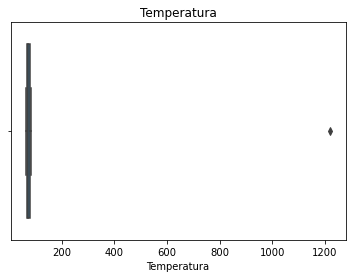

In [11]:
srn.boxplot(x = dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

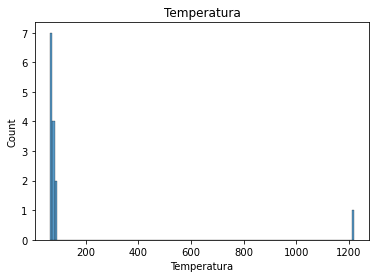

In [12]:
srn.histplot(x = dataset['Temperatura']).set_title('Temperatura')

In [13]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

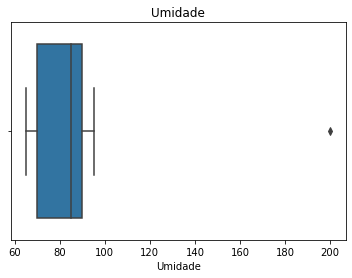

In [14]:
srn.boxplot(x = dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

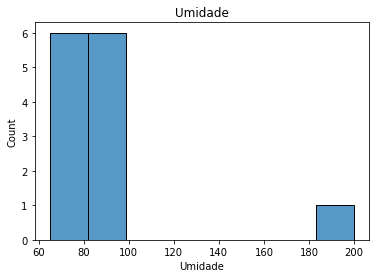

In [15]:
srn.histplot(x = dataset['Umidade']).set_title('Umidade')

# Tratamento de dados

In [16]:
#contando valores NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [18]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [19]:
#Substituir NAs por mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [20]:
#Verificar se ainda existem NAs
dataset['Umidade'].isnull().sum()

0

In [21]:
#Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [22]:
#Verificando valores NAs Vento
dataset['Vento'].isnull().sum()

1

In [23]:
#preencher NAs com FALSO (moda)
dataset['Vento'].fillna('FALSO', inplace = True)

In [24]:
#Verificamos a remoção
dataset['Vento'].isnull().sum()

0

In [25]:
#Verificando valores NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [26]:
#tratando outliers
dataset['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [27]:
#Visualizar valores outliers
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,FALSO,sim


In [28]:
#calcular mediana da coluna Umidade
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [29]:
#Substituindo outliers pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 130), 'Umidade'] = mediana

In [30]:
#Verificar se ainda existem outliers
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
dataset['Umidade'].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [32]:
#Tempratura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [33]:
#Visualizar valores outliers
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [34]:
#calcular a mediana da coluna Tempratura
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [35]:
#substituição dos outliers pela mediana calculada
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [36]:
#verificar se ainda existem valores outliers
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [37]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [38]:
#Aparencia
#Falta de Padronização 

In [39]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado 

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [41]:
#preenchendo com a chuva(moda)
dataset.loc[dataset['Aparencia'] == 'menos'] = 'chuva' 

In [42]:
#verificando alteração
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [43]:
dataset.shape

(14, 5)

In [46]:
#exportação de valores
fileName = '/dados/processed.csv'
dataset.to_csv(os.getcwd()+ fileName, index = False, header=True)